In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import defaultdict
from __future__ import division
%matplotlib inline

In [2]:
N = 1000
p = 0.05
G = nx.erdos_renyi_graph(N, p)

## Model 1

Выбираем случайно вершину i и активируем ее(заражаем, если говорить в терминах эпидемиологии). Далее, итерационно делаем следующее: 
1. Выбираем случайным образом одного активного соседа этой вершины, скажем вершину j. И с вероятностью p (параметр модели) вылечиваем вершину j. 
2. С вероятностью 1-p заражаю случайно выбранного здорового соседа 
3. Из зараженных случайно выбираем одну и повторяем шаги 1),2) 

In [3]:
def model1(G, N, numberSteps, threshold, initInfectedNumber):
    num_inf = []
    num_susc = []
    
    inf = []
    susc = []
    inf = random.sample(range(1, nx.number_of_nodes(G)), initInfectedNumber)
    for i in range(N):
        if i not in inf:
            susc.append(i)  
    cur_infected_node = random.choice(inf)
    
    for i in range(numberSteps):
        neighbors_of_cur = list(nx.all_neighbors(G, cur_infected_node))
        inf_neighbors = []
        susc_neighbors = []
        for elem in neighbors_of_cur:
            if elem in inf:
                inf_neighbors.append(elem)
            else:
                susc_neighbors.append(elem)
        
        if not inf_neighbors or not susc_neighbors:
            break
          
        recovered_elem = random.choice(inf_neighbors)
        p = random.uniform(0, 1)
        if p > threshold:
            susc.append(recovered_elem)
            inf.remove(recovered_elem)
        inf_elem = random.choice(susc_neighbors)
        p = random.uniform(0, 1)
        if 1 - p > threshold:
            inf.append(inf_elem)
            susc.remove(inf_elem)
        cur_infected_node = random.choice(inf)
        
      
        num_inf.append(len(inf) / N)
        num_susc.append(len(susc) / N)
        
    return num_inf, num_susc, inf, susc

In [12]:
num_inf, num_susc, inf, susc = model1(G, N, 100000, 0.999, 500)

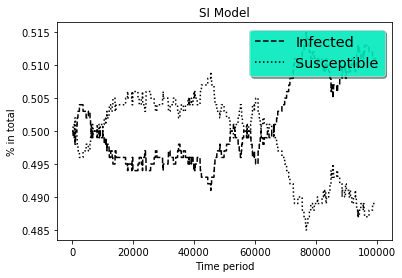

In [13]:
steps = np.arange(1, len(num_inf) + 1, 1)

fig, ax = plt.subplots()
ax.plot(steps, num_inf, 'k--', label='Infected')
ax.plot(steps, num_susc, 'k:', label='Susceptible')

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

legend.get_frame().set_facecolor('#00FFCC')

ax.set_xlabel('Time period')
ax.set_ylabel('% in total')
ax.set_title('SI Model')

plt.show()